<a href="https://colab.research.google.com/github/RatchanonMo/curriculum/blob/main/data_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import os
import os.path as op
import shutil
from glob import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split

In [9]:
# สำหรับคนที่ยังไม่ได้ลงไลบรารี่ fastbook ให้ uncomment บรรทัด !pip install
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

Mounted at /content/gdrive


In [10]:
from fastbook import *

In [11]:
fields = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    get_y=parent_label,
    splitter=RandomSplitter(valid_pct=0.2, seed=42), # GrandparentSplitter(valid_name='validation')
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms()
)

In [13]:
get_image_files("/content/gdrive/MyDrive/dataset/good_or_bad/test")

(#134) [Path('/content/gdrive/MyDrive/dataset/good_or_bad/test/00000023.jpg'),Path('/content/gdrive/MyDrive/dataset/good_or_bad/test/00000004.jpg'),Path('/content/gdrive/MyDrive/dataset/good_or_bad/test/00000043.jpg'),Path('/content/gdrive/MyDrive/dataset/good_or_bad/test/00000045(1).jpg'),Path('/content/gdrive/MyDrive/dataset/good_or_bad/test/00000069.jpg'),Path('/content/gdrive/MyDrive/dataset/good_or_bad/test/00000086.jpg'),Path('/content/gdrive/MyDrive/dataset/good_or_bad/test/00000079.jpg'),Path('/content/gdrive/MyDrive/dataset/good_or_bad/test/00000127(1).jpg'),Path('/content/gdrive/MyDrive/dataset/good_or_bad/test/00000113.jpg'),Path('/content/gdrive/MyDrive/dataset/good_or_bad/test/00000096.jpg')...]

In [14]:
parent_label("/content/gdrive/MyDrive/dataset/good_or_bad/test/00000004.jpg")

'test'

In [15]:
dls = fields.dataloaders("/content/gdrive/MyDrive/dataset/good_or_bad/train")

In [16]:
dls.vocab

['bad', 'good']

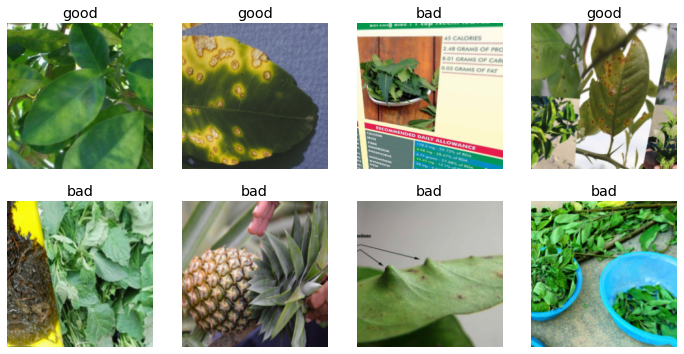

In [17]:
dls.train.show_batch(max_n=8, nrows=2)

In [18]:
learner = cnn_learner(dls, resnet34, metrics=[error_rate, accuracy])

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:265: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency e

SuggestedLRs(valley=0.0010000000474974513)

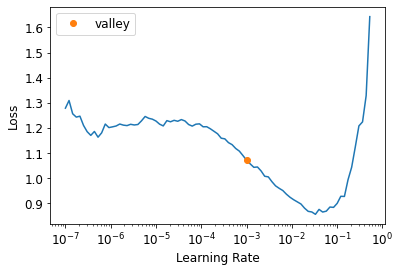

In [19]:
learner.lr_find() # หา learning rate ที่เหมาะสม

In [20]:
learner.fine_tune(epochs=10, freeze_epochs=1, base_lr=0.0017)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.913900,0.501415,0.177419,0.822581,04:21


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.622420,0.569005,0.193548,0.806452,05:46
1,0.538510,0.550733,0.172043,0.827957,05:46
2,0.439818,0.496547,0.155914,0.844086,05:46
3,0.393661,0.674147,0.188172,0.811828,05:56
4,0.348716,0.545602,0.139785,0.860215,05:45
5,0.291089,0.487495,0.150538,0.849462,05:46
6,0.245976,0.553440,0.150538,0.849462,05:47
7,0.205444,0.600885,0.155914,0.844086,05:47
8,0.176301,0.604222,0.155914,0.844086,05:46
9,0.156329,0.598966,0.150538,0.849462,05:45


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency e

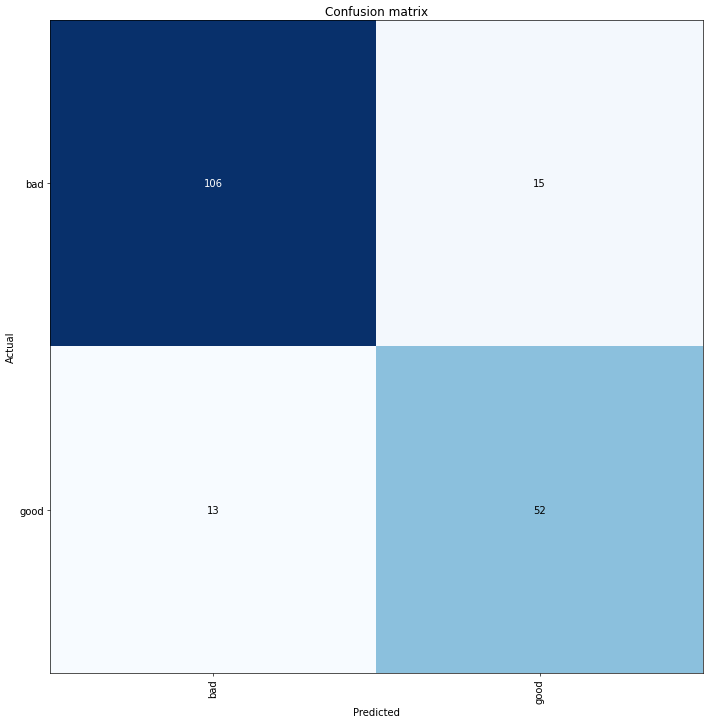

In [21]:
interp = ClassificationInterpretation.from_learner(learner)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

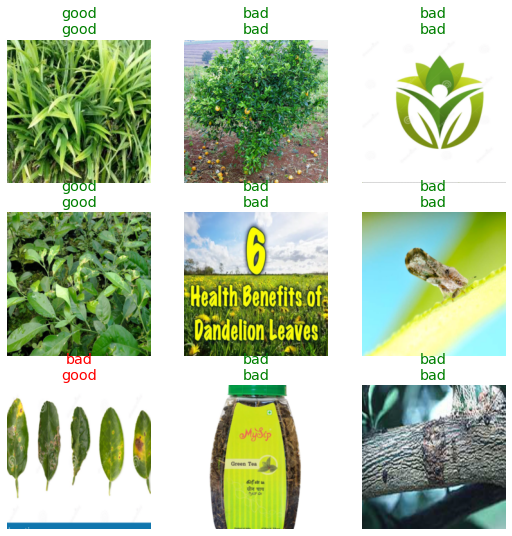

In [23]:
learner.show_results(shuffle=True)

In [24]:
learner.export("/content/gdrive/MyDrive/dataset/data_model.pkl")

In [ ]:
!pip install fastbook
from fastbook import *
from glob import glob
from pathlib import Path
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, roc_auc_score
  
learn_inf = load_learner('/content/gdrive/MyDrive/dataset/data_model.pkl')